In [1]:
from keras.layers import Input, Lambda, Dense, Flatten 
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
#resize all the images -> default all images in vgg16 model is 224,224
IMAGE_SIZE = [224, 224]

In [3]:
train_path = r"C:\Users\anuhy\Downloads\archive (3)\chest_xray\train"
valid_path = r"C:\Users\anuhy\Downloads\archive (3)\chest_xray\test"

In [4]:
#add preprocessing layer to the front of VGG
vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
#dont train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [6]:
#useful for getting number of classes
folders = glob(r"C:\Users\anuhy\Downloads\archive (3)\chest_xray\train\*")

In [7]:
#our layers - you can add more if you want
x = Flatten()(vgg.output)
x = Dense(64, activation='relu')(x)
prediction = Dense(2, activation='softmax')(x)

In [8]:
pip install keras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
#create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [10]:
#view the structure of the model
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,320,514 (62.26 MB)

 Trainable params: 1,605,826 (6.13 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [11]:
#tell the model what cost and optimization method to use
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [12]:
directory1 = r"C:\Users\anuhy\Downloads\archive (3)\chest_xray\test"

In [13]:
directory2 = r"C:\Users\anuhy\Downloads\archive (3)\chest_xray\train"

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    directory2,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'  # Ensure this is set to 'categorical'
)

test_set = test_datagen.flow_from_directory(
    directory1,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'  # Ensure this is set to 'categorical'
)


Found 4980 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [15]:
len(training_set)

156

Found 4980 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/10


C:\Users\anuhy\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


156/156 ━━━━━━━━━━━━━━━━━━━━ 1374s 9s/step - accuracy: 0.7013 - loss: 1.1255 - val_accuracy: 0.6250 - val_loss: 0.5252
Epoch 2/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 1245s 8s/step - accuracy: 0.7454 - loss: 0.4304 - val_accuracy: 0.7324 - val_loss: 0.5391
Epoch 3/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 1186s 8s/step - accuracy: 0.8183 - loss: 0.3730 - val_accuracy: 0.8125 - val_loss: 1.1983
Epoch 4/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 1188s 8s/step - accuracy: 0.8595 - loss: 0.5366 - val_accuracy: 0.8750 - val_loss: 0.3158
Epoch 5/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 1198s 8s/step - accuracy: 0.9219 - loss: 0.1974 - val_accuracy: 0.8782 - val_loss: 0.3464
Epoch 6/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 1269s 8s/step - accuracy: 0.9376 - loss: 0.1677 - val_accuracy: 0.9022 - val_loss: 0.2882
Epoch 7/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 1242s 8s/step - accuracy: 0.9602 - loss: 0.1150 - val_accuracy: 0.8862 - val_loss: 0.3005
Epoch 8/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 1246s 8s/step - accuracy: 0.9625 - loss: 0.1127 - val_accurac

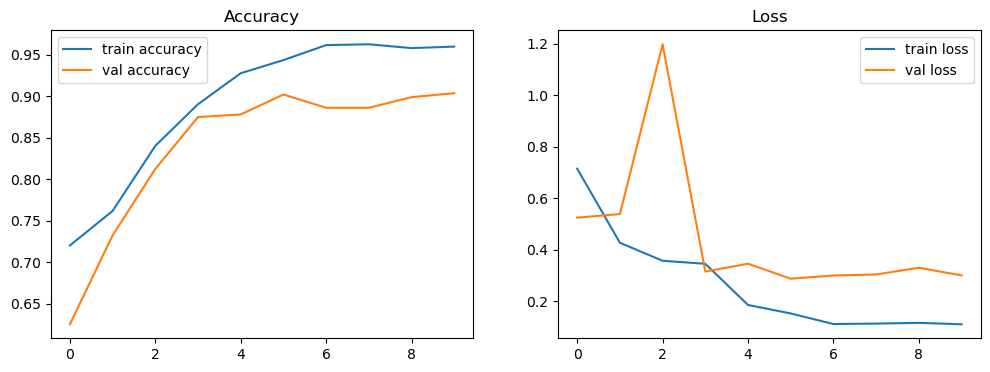

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt
from keras.applications import VGG16

# Image data generators with more augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Prepare the training set
training_set = train_datagen.flow_from_directory(
    r"C:\Users\anuhy\Downloads\archive (3)\chest_xray\train",  
    target_size=(224, 224),  # Larger input size for pre-trained models
    batch_size=32,
    class_mode='categorical'
)

# Prepare the test set
test_set = test_datagen.flow_from_directory(
    r"C:\Users\anuhy\Downloads\archive (3)\chest_xray\test", 
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Determine the number of classes
num_classes = len(training_set.class_indices)

# Load pre-trained VGG16 model + higher level layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers except the last 4 layers
for layer in base_model.layers[:-4]:
    layer.trainable = False

# Create the model
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks for learning rate adjustment and early stopping
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Calculate the steps per epoch
total_training_batches = len(training_set)
total_validation_batches = len(test_set)

# Set steps per epoch to half of the total training batches, for example
steps_per_epoch = total_training_batches // 2

# Fit the model
history = model.fit(
    training_set,
    validation_data=test_set,
    epochs=10,
    batch_size = 256
    
)

# Plot the accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')

plt.show()


In [ ]:
steps_per_epoch=steps_per_epoch,
    validation_steps=total_validation_batches,
    callbacks=[lr_scheduler, early_stopping]

### 